Notebook for elaboration of grid frames.

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
data = []

data = pd.read_csv('./output.txt', names=['x', 'y', 'density']).values
data
'''
x, y, density = data.x[:6724], data.y[:6724], data.density[:6724]
print(x[6723])
print(y[6723])
print(density[6723])
'''

'\nx, y, density = data.x[:6724], data.y[:6724], data.density[:6724]\nprint(x[6723])\nprint(y[6723])\nprint(density[6723])\n'

In [73]:
data.head()

,x,y,density
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [74]:
data.describe()

,x,y,density
count,342924.000000,342924.000000,342924.000000
mean,40.500000,40.500000,0.563574
std,23.669635,23.669635,10.334093
min,0.000000,0.000000,0.000000
25%,20.000000,20.000000,0.000000
50%,40.500000,40.500000,0.000000
75%,61.000000,61.000000,0.000000
max,81.000000,81.000000,255.000000


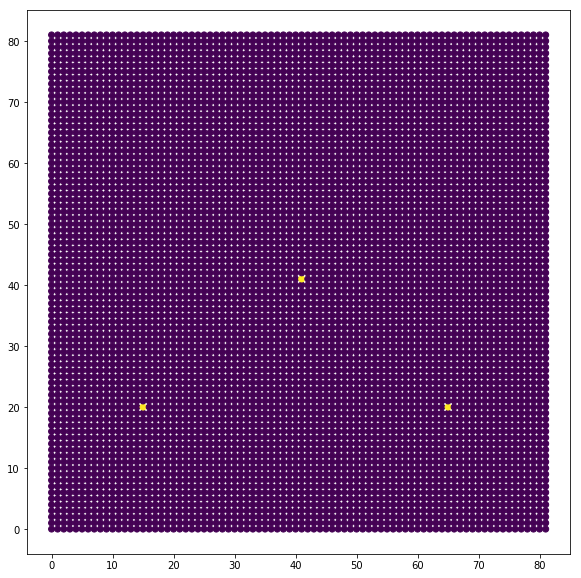

In [125]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y, c=density)
ax.set_aspect(1)

plt.show()